In [ ]:
!pip install netcomp

     |████████████████████████████████| 1.3 MB 8.1 MB/s 
  Created wheel for netcomp: filename=NetComp-0.2.3-py3-none-any.whl size=12581 sha256=cface7cf2d27337ace4b0d214fe95a30daa84bfe2f705bdfb3ef7f8d87cf384e
  Stored in directory: /root/.cache/pip/wheels/dd/d6/b2/fd540c31b4c84345836b744b9e15e9b2767a1c132c1bc2a812
Successfully built netcomp
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.18.3 requires networkx>=2.0, but you have networkx 1.11 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install --upgrade networkx 

     |████████████████████████████████| 1.9 MB 9.8 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
netcomp 0.2.3 requires networkx<2, but you have networkx 2.6.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import networkx as nx
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive')

In [ ]:
import DataGenerator as DG

## Pref Attcahment Training Data 

genrating 100 training (both input and target) graphs for the prefrential attachment model with 28 nodes and m, Number of edges to attach from a new node to existing nodes where m is in ms = [5, 7, 10, 12, 15, 17, 20, 22, 25] repeated 4 times

In all this will return a list of 3600 training and testing graphs for the prefrential attachment model. (note that the input graphs are sums of 10 other randomlly generated graphs)



In [ ]:

x_train_pref = []
y_train_pref = []

ms = [5, 7, 10, 12, 15, 17, 20, 22, 25, 
      5, 7, 10, 12, 15, 17, 20, 22, 25, 
      5, 7, 10, 12, 15, 17, 20, 22, 25, 
      5, 7, 10, 12, 15, 17, 20, 22, 25] #the values of ms to work through for the Pref Attachment model 

for i in tqdm(ms): 
  x_train_pref, y_train_pref = DG.Data_Generator(sample_x_list=x_train_pref, sample_y_list=y_train_pref, sample_size=100, generator='pref', nodes=28, N=10, m=i)

#x_test, y_test = Data_Generator(sample_x_list=x_test, sample_y_list=y_test, sample_size=10, generator='pref', nodes=28, N=10, m=15) 

100%|██████████| 36/36 [09:21<00:00, 15.61s/it]


In [ ]:
len(x_train_pref)

3600

In [ ]:
np.save('/content/xtrain_pref.npy', x_train_pref, allow_pickle=True)
np.save('/content/ytrain_pref.npy', y_train_pref, allow_pickle=True)

files.download('/content/xtrain_pref.npy')
files.download('/content/ytrain_pref.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

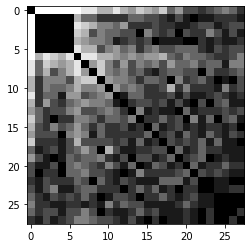

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train_pref[20], cmap=plt.get_cmap('gray'))

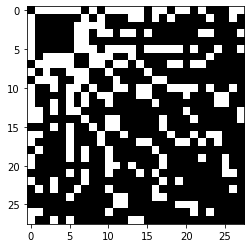

In [ ]:
plt.imshow(y_train_pref[20], cmap=plt.get_cmap('gray'))

## Bern Training Data 

genrating 3600 training (both input and target) graphs for the prefrential attachment model with 28 nodes and bernoulli parameters $a$ and $b$ generated uniformly between 0.5 and 5 (note that the input graphs are sums of 10 other randomlly generated graphs)

In [ ]:
x_train_bern =[]
y_train_bern = []
for i in tqdm(range(36)):
  a_val = np.random.uniform(0.5, 5.0, 1)
  b_val = np.random.uniform(0.5, 5.0, 1)
  x_train_bern, y_train_bern = DG.Data_Generator(sample_x_list=x_train_bern, sample_y_list=y_train_bern, sample_size=100, generator='bern', nodes=28, N=10, a=a_val[0],b=b_val[0])

100%|██████████| 36/36 [14:30<00:00, 24.18s/it]


In [ ]:
len(x_train_bern)

3600

In [ ]:
np.save('/content/xtrain_bern.npy', x_train_bern, allow_pickle=True)
np.save('/content/ytrain_bern.npy', y_train_bern, allow_pickle=True)

files.download('/content/xtrain_bern.npy')
files.download('/content/ytrain_bern.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

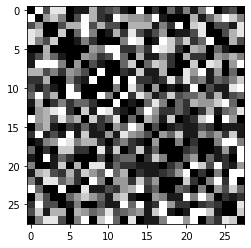

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train_bern[20], cmap=plt.get_cmap('gray'))

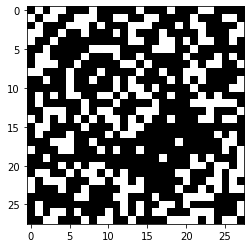

In [ ]:
plt.imshow(y_train_bern[20], cmap=plt.get_cmap('gray'))

## Stochastic Block Training  Data 

genrating 3600 training (both input and target) graphs for the stochastic block model.All 3600 have 28 nodes  1800 of the graphs have two communities (14 nodes each) and 1800 have three communities (10 nodes, 10 nodes, 8 nodes).The connection probabilities for intra community connections are generated uniformaly at random between 0.5 and 0.9. The cross community connections are choosen at random (again uniformnilly) between 0.01 and 0.5. (note that the input graphs are sums of 10 other randomlly generated graphs)

In [ ]:
block2_sizes = [14, 14]
block3_sizes = [10,10,8]

x_train_sb =[]
y_train_sb = []

for i in tqdm(range(36)): 
  com_in = np.random.uniform(0.5,0.9, 3).round(2)
  com_out = np.random.uniform(0.01,0.5,3).round(2)
  block2_probs = [[com_in[0],com_out[0]], [com_out[0],com_in[1]]]

  block3_probs = [[com_in[0],com_out[0], com_out[1]], 
                  [com_out[0],com_in[1], com_out[2]], 
                  [com_out[1], com_out[2], com_in[2]]] 
  if i < 19: 
    x_train_sb, y_train_sb = DG.Data_Generator(sample_x_list=x_train_sb, sample_y_list=y_train_sb, 
                                            sample_size=100, generator='sb', nodes=28, 
                                            N=10, sb_sizes=block2_sizes, sb_p=block2_probs)
  else: 
    x_train_sb, y_train_sb = DG.Data_Generator(sample_x_list=x_train_sb, sample_y_list=y_train_sb, 
                                            sample_size=100, generator='sb', nodes=28, 
                                            N=10, sb_sizes=block3_sizes, sb_p=block3_probs)

100%|██████████| 36/36 [23:30<00:00, 39.18s/it]


In [ ]:
len(x_train_sb)

3600

In [ ]:
np.save('/content/xtrain_sb.npy', x_train_sb, allow_pickle=True)
np.save('/content/ytrain_sb.npy', y_train_sb, allow_pickle=True)

files.download('/content/xtrain_sb.npy')
files.download('/content/ytrain_sb.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

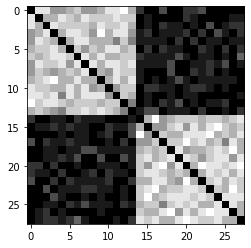

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train_sb[450], cmap=plt.get_cmap('gray'))

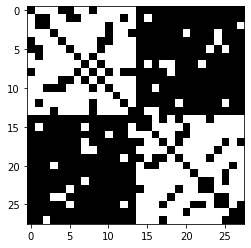

In [ ]:
plt.imshow(y_train_sb[450], cmap=plt.get_cmap('gray'))

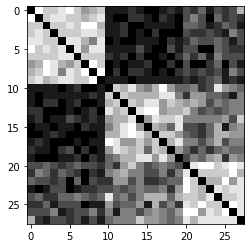

In [ ]:
plt.imshow(x_train_sb[2000], cmap=plt.get_cmap('gray'))

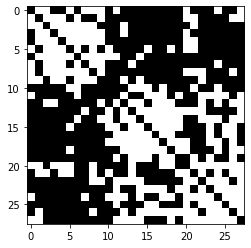

In [ ]:
plt.imshow(y_train_sb[2000], cmap=plt.get_cmap('gray'))

# Testing Data 

## Pref Attcahment Testing Data 

genrating 100 training (both input and target) graphs for the prefrential attachment model with 28 nodes and m, Number of edges to attach from a new node to existing nodes where m is in ms = [6, 8, 11, 13, 14, 16, 21, 23, 26]. 

In all this will return a list of 900 training and testing graphs for the prefrential attachment model. (note that the input graphs are sums of 10 other randomlly generated graphs)

In [ ]:
x_test_pref = []
y_test_pref = []

ms = [5, 7, 10, 12, 15, 17, 20, 22, 25]

for i in tqdm(ms): 
  x_test_pref, y_test_pref = DG.Data_Generator(sample_x_list=x_test_pref, sample_y_list=y_test_pref, sample_size=100, generator='pref', nodes=28, N=10, m=i)


100%|██████████| 9/9 [02:28<00:00, 16.47s/it]


In [ ]:
len(x_test_pref)

900

In [ ]:
np.save('/content/xtest_pref.npy', x_test_pref, allow_pickle=True)
np.save('/content/ytest_pref.npy', y_test_pref, allow_pickle=True)

files.download('/content/xtest_pref.npy')
files.download('/content/ytest_pref.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

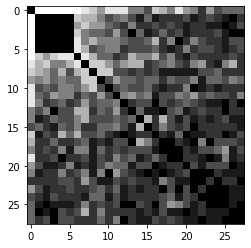

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test_pref[20], cmap=plt.get_cmap('gray'))

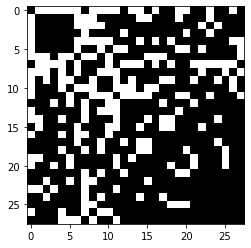

In [ ]:
plt.imshow(y_test_pref[20], cmap=plt.get_cmap('gray'))

## Bern Testing Data 

genrating 900 testing (both input and target) graphs for the prefrential attachment model with 28 nodes and bernoulli parameters $a$ and $b$ generated uniformly between 0.5 and 5 (note that the input graphs are sums of 10 other randomlly generated graphs)

In [ ]:
x_test_bern =[]
y_test_bern = []
for i in tqdm(range(9)):
  a_val = np.random.uniform(0.5, 5.0, 1)
  b_val = np.random.uniform(0.5, 5.0, 1)
  x_test_bern, y_test_bern = DG.Data_Generator(sample_x_list=x_test_bern, 
                                                 sample_y_list=y_test_bern, 
                                                 sample_size=100, generator='bern', 
                                                 nodes=28, N=10, 
                                                 a=a_val[0],b=b_val[0])

100%|██████████| 9/9 [03:41<00:00, 24.66s/it]


In [ ]:
len(x_test_bern)

900

In [ ]:
np.save('/content/xtest_bern.npy', x_test_bern, allow_pickle=True)
np.save('/content/ytest_bern.npy', y_test_bern, allow_pickle=True)

files.download('/content/xtest_bern.npy')
files.download('/content/ytest_bern.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

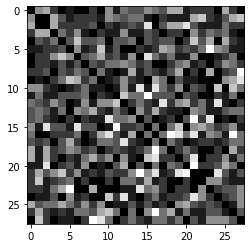

In [ ]:
plt.imshow(x_test_bern[20], cmap=plt.get_cmap('gray'))

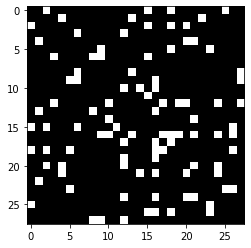

In [ ]:
plt.imshow(y_test_bern[20], cmap=plt.get_cmap('gray'))

## Stochastic Block Testing Data 

genrating 900 testing (both input and target) graphs for the stochastic block model.All 900 have 28 nodes 450 of the graphs have two communities (14 nodes each) and 450 have three communities (10 nodes, 10 nodes, 8 nodes).The connection probabilities for intra community connections are generated uniformaly at random between 0.5 and 0.9. The cross community connections are choosen at random (again uniformnilly) between 0.01 and 0.5. (note that the input graphs are sums of 10 other randomlly generated graphs)

In [ ]:
block2_sizes = [14, 14]
block3_sizes = [10,10,8]

x_test_sb =[]
y_test_sb = []

for i in tqdm(range(9)): 
  com_in = np.random.uniform(0.5,0.9, 3).round(2)
  com_out = np.random.uniform(0.01,0.5,3).round(2)
  block2_probs = [[com_in[0],com_out[0]], [com_out[0],com_in[1]]]

  block3_probs = [[com_in[0],com_out[0], com_out[1]], 
                  [com_out[0],com_in[1], com_out[2]], 
                  [com_out[1], com_out[2], com_in[2]]] 
  if i <= 4: 
    x_test_sb, y_test_sb = DG.Data_Generator(sample_x_list=x_test_sb, sample_y_list=y_test_sb, 
                                            sample_size=100, generator='sb', nodes=28, 
                                            N=10, sb_sizes=block2_sizes, sb_p=block2_probs)
  else: 
    x_test_sb, y_test_sb = DG.Data_Generator(sample_x_list=x_test_sb, sample_y_list=y_test_sb, 
                                            sample_size=100, generator='sb', nodes=28, 
                                            N=10, sb_sizes=block3_sizes, sb_p=block3_probs)

100%|██████████| 9/9 [06:10<00:00, 41.14s/it]


In [ ]:
len(x_test_sb)

900

In [ ]:
np.save('/content/xtest_sb.npy', x_test_sb, allow_pickle=True)
np.save('/content/ytest_sb.npy', y_test_sb, allow_pickle=True)

files.download('/content/xtest_sb.npy')
files.download('/content/ytest_sb.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

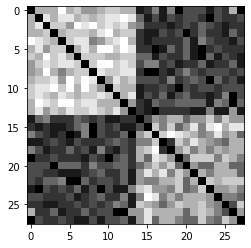

In [ ]:
plt.imshow(x_test_sb[0], cmap=plt.get_cmap('gray'))

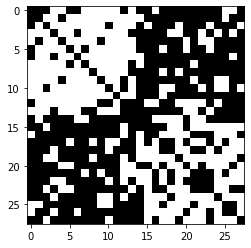

In [ ]:
plt.imshow(y_test_sb[0], cmap=plt.get_cmap('gray'))

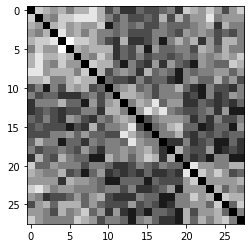

In [ ]:
plt.imshow(x_test_sb[600], cmap=plt.get_cmap('gray'))

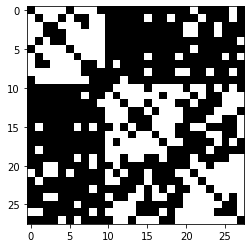

In [ ]:
plt.imshow(y_test_sb[600], cmap=plt.get_cmap('gray'))